# Matplotlib basics

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is the most used visualization library.

* [1. Introduction](#1)
* [2. Types of plots](#2)
    * [Basic plot](#2.1)
    * [Scatter plot](#2.2)
    * [Histograms](#2.3)
    * [Bar plots](#2.4)
* [3. Organizing plots](#3)
* [4. Adding text](#4)

## 1. Introduction <a class="anchor" id="1"></a>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

There are different elements in a plot:
* The Figure: the whole plot
* Axes: the region of the image with actual data. We can have more than one Axes in our Figure
* Axis: the lines that set the limits of your plot
* Artist: all elements in the plot (text, lines, patches, etc)

This is a simple example to create a Figure and Axes and plot some data

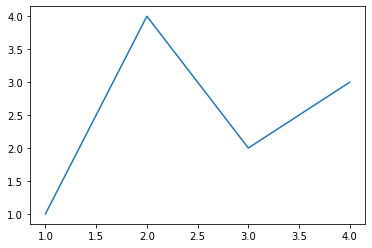

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

We can do exactly the same like this:

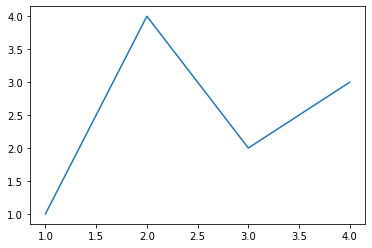

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

The only difference is that we do not keep track of the Figure or Axes. 
In general in Matplotlib we can decide to wether explicitly create these objects and call the methods on them or to rely on the pyplot (plt) module to perform the same visualizations.

## 2. Types of plots  <a class="anchor" id="2"></a>

### Basic plot <a class="anchor" id="2.1"></a>

As we saw in the previous example, n the most basic plot scenario, we can pass to the plot function a list of y-coordinates (or x-y pairs) to generate the previous plot. There is an optional third argument which is the format string that indicates the color and line type of the plot. For example, 'ro' indicates red dots.

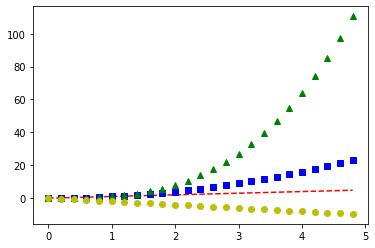

In [4]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, -2*t, 'yo')
plt.show()

It is also possible to specify some parameters such as color and linewidth:

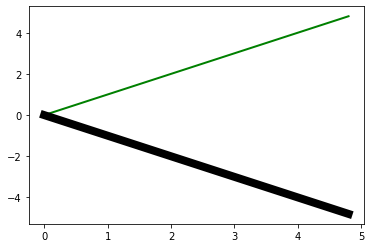

In [5]:
plt.plot(t, t, color='g', linewidth=2.0)
plt.plot(t, -t, color='k', linewidth=8.0)

Another useful tip is to add vertical or horizontal lines to the plot

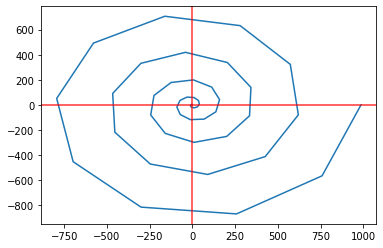

In [6]:
x = []
y = []
for theta in np.linspace(0,10*np.pi):
    r = ((theta)**2)
    x.append(r*np.cos(theta))
    y.append(r*np.sin(theta))

plt.plot(x,y) 
plt.axhline(0, alpha=0.8, color='r')
plt.axvline(0, alpha=0.8, color='r')
plt.show()


### Scatter plot <a class="anchor" id="2.2"></a>

The basic scatter plot receives a pair of x-y cordinates:

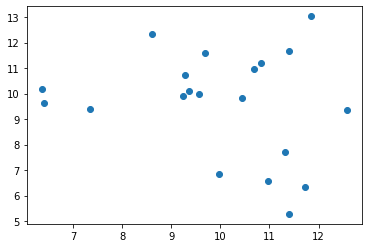

In [7]:
plt.scatter(np.random.normal(10,2, 20),np.random.normal(10,2,20))
plt.show()

If you have data that you can access through string indexes (such as dictionaries or pandas dataframes) you can use the keyword *data* to access the different elements to plot

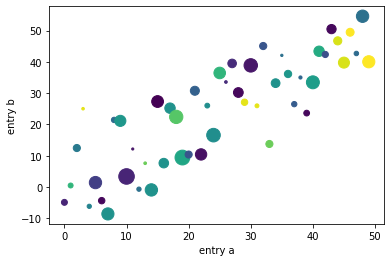

In [8]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Histograms <a class="anchor" id="2.3"></a>

You can create histograms by simply calling the ```hist``` method. Some useful parameters are:
* bins: to specify the boundaries of the bins (recall to include the upper/lower)
* density: to normalize bin heights so that the integral of the histogram is 1 
* ec: to indicate the color of the contour
* histtype: {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

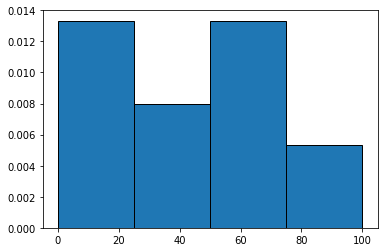

In [9]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
plt.hist(a, bins = [0,25,50,75,100], density=1, ec='k')
plt.show()

The ```hist``` function returns three parameters:
* n: the value for each of the bins in the histogram
* bins: the edges of the bins 
* patches: a list of artists
We can use the return values to add, for example, the best fitting line.

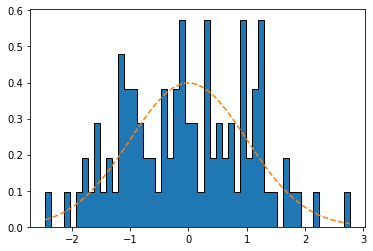

In [10]:
num_bins = 50
sigma = 1
mu = 0
x = np.random.normal(mu,sigma,100)
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, histtype = 'stepfilled', ec='k', density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')

plt.show()

### Bar plots <a class="anchor" id="2.4"></a>

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The input arguments are:
* x: sequence of scalars representing the x coordinates of the bars
* height: scalar or sequence of scalars representing the height(s) of the bars.
* width: scalar or array-like, optional. the width(s) of the bars default 0.8
* bottom: scalar or array-like, optional. the y coordinate(s) of the bars bottom of the bars
* align: {‘center’, ‘edge’}, optional, default ‘center’

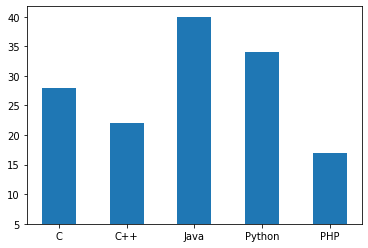

In [11]:
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
plt.bar(langs,students, width=0.5, bottom=5)
plt.show()

It is also possible to generate horizontal barplots. The input arguments are:
* y: sequence of scalars representing the y coordinates of the bars
* width: scalar or array-like, optional
* height: scalar or sequence of scalars representing the height(s) of the bars, default is 0.8
* left: scalar or array-like, optional. the x coordinate(s) of the left part of the abrs
* align: {‘center’, ‘edge’}, optional, default ‘center’

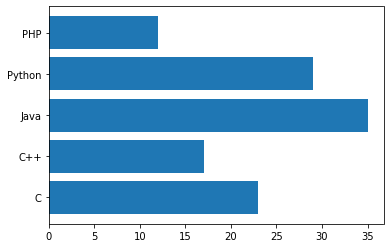

In [12]:
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
plt.barh(langs,students)
plt.show()

You can group bars together specifying the position of each of the groups

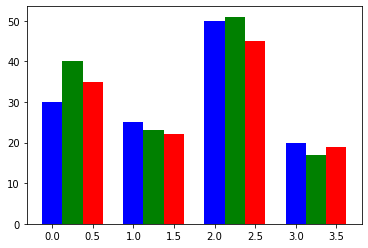

In [13]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.show()

We can even stack in the same bar different groups

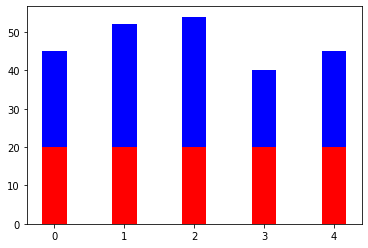

In [14]:
N = 5
g1 = (20, 35, 30, 35, 27)
g2 = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
plt.bar(ind, g1, width, color='r')
plt.bar(ind, g2, width,bottom=np.min(g2), color='b')
plt.show()

Another useful trick is to plot positive and negative data together

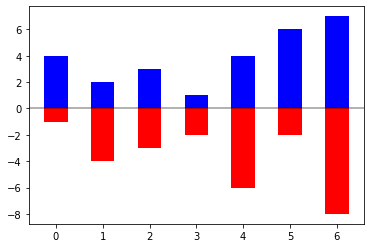

In [15]:
x = range(7)
negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = [4,2,3,1,4,6,7,]

fig = plt.figure()
plt.bar(x, negative_data, color='r', width=0.5)
plt.bar(x, positive_data, color='b', width = 0.5)
plt.axhline(0, alpha=0.4, color='k')
plt.show()

## 3. Organizing plots  <a class="anchor" id="3"></a>

We can create several plots inside the same figure. To do so call the ```subplot``` method, that takes as input a code indicating the number of rows, number of columns, and plot index.

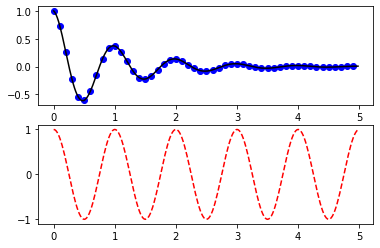

In [16]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


You can also use the ```subplots``` method to generate some axes in the same figure and then plot on them:

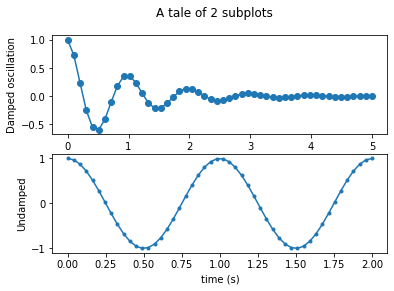

In [17]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

## 4. Adding text  <a class="anchor" id="4"></a>
We can add text to figures with the following methods: ```xlabel, ylabel, title, text```. We can also specify if we want to visualize the grid. As you can observe in the example, it is possible to enter LaTeX expressions.

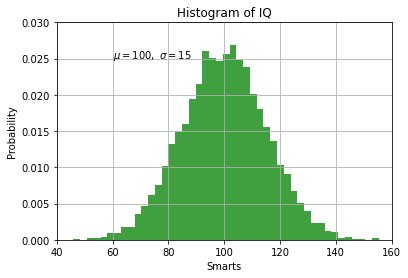

In [18]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

You can also highlight some part of the plot with the ```annotate``` method.

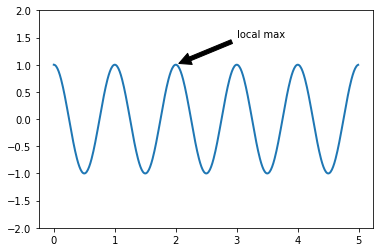

In [19]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()